<h2><center> Optimising Urban Sustainability: "A Data-Driven Analysis of Boston's Utility Consumption"</center></h2>

<center><h3>Team Members</h3>Aditi Ashutosh Deodhar, Aishwarya Vikas Patil, Riya Singh, Palak Rajdev</center>
<br>
<center>
<img src="images/title.png" width=500 />
</center>

### Motivation and Goal:
Urban sustainability is a critical concern in modern city planning, and optimising utility
consumption plays a pivotal role in achieving environmentally friendly and cost-effective
urban environments.
- The motivation behind this project is to leverage the [City of Boston Utility Data](https://data.boston.gov/dataset/city-of-boston-utility-data) to gain insights into the patterns and trends of utility consumption across different
neighbourhoods in Boston and across different seasons.
- Our goal is to identify areas for improvement, assess the impact of existing policies,
and propose data-driven recommendations for optimising utility consumption in the
city.

### Part 1 - Data Exploration and Preprocessing:

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Reading data from the dataset
df = pd.read_csv("data/monthlyutilitydata.csv")

In [3]:
# Getting snapshot of the data
df.head()

,InvoiceID,AccountNumber,EnergyTypeName,InvoiceDate,FromDate,ToDate,UsagePeriodDays,DeliveryCost,SupplyCost,TotalCost,...,StreetAddress,City,Zip,StateName,Abbreviation,CountryName,SiteName,Currency,CodeDescription,DepartmentName
0,6590186,9504656628,Steam,2014-12-01,2014-10-30,2014-12-01,32,2492.31,0.00,2492.31,...,City Hall Plaza,Boston,02108,Massachusetts,MA,United States,Unknown,USD,Delivery Invoice,PMD
1,6768422,27158900020,Electric,2014-08-18,2014-07-18,2014-08-18,31,109.86,105.01,214.87,...,Washington St. Op. 2671,Boston,02119,Massachusetts,MA,United States,Metered Streetlights,USD,Supply and Delivery Invoices,PWD
2,6768423,26436161009,Electric,2015-09-21,2015-08-20,2015-09-21,32,34.14,35.21,69.35,...,155 Talbot Ave,Boston,02124,Massachusetts,MA,United States,Lee,USD,Supply and Delivery Invoices,BPS
3,6768424,26433161002,Electric,2015-04-08,2015-03-10,2015-04-08,29,8.02,10.21,18.23,...,570 American Legion Hwy,Boston,02131,Massachusetts,MA,United States,Haley,USD,Supply and Delivery Invoices,BPS
4,6768425,26436161009,Electric,2015-01-22,2014-12-22,2015-01-22,31,32.36,56.10,88.46,...,155 Talbot Ave,Boston,02124,Massachusetts,MA,United States,Lee,USD,Supply and Delivery Invoices,BPS


In [4]:
# displaying columns in the dataframe
df.columns

Index(['InvoiceID', 'AccountNumber', 'EnergyTypeName', 'InvoiceDate',
       'FromDate', 'ToDate', 'UsagePeriodDays', 'DeliveryCost', 'SupplyCost',
       'TotalCost', 'TotalConsumption', 'DemandkW', 'UomName', 'StreetAddress',
       'City', 'Zip', 'StateName', 'Abbreviation', 'CountryName', 'SiteName',
       'Currency', 'CodeDescription', 'DepartmentName'],
      dtype='object')

In [5]:
# displaying datatypes of each column
df.dtypes

InvoiceID             int64
AccountNumber        object
EnergyTypeName       object
InvoiceDate          object
FromDate             object
ToDate               object
UsagePeriodDays       int64
DeliveryCost        float64
SupplyCost          float64
TotalCost           float64
TotalConsumption    float64
DemandkW            float64
UomName              object
StreetAddress        object
City                 object
Zip                  object
StateName            object
Abbreviation         object
CountryName          object
SiteName             object
Currency             object
CodeDescription      object
DepartmentName       object
dtype: object

In [6]:
# checking for null values in the dataset
df.isnull().sum()

InvoiceID              0
AccountNumber          0
EnergyTypeName         0
InvoiceDate            0
FromDate               0
ToDate                 0
UsagePeriodDays        0
DeliveryCost           0
SupplyCost             0
TotalCost              0
TotalConsumption     307
DemandkW             307
UomName              307
StreetAddress          0
City                   0
Zip                    0
StateName             97
Abbreviation          97
CountryName            0
SiteName               0
Currency               0
CodeDescription        0
DepartmentName      2450
dtype: int64

In [7]:
# Addressing null values for the identified columns

#1.UomName
conditions = [
    (df['EnergyTypeName'] == 'Electric') & (df['UomName'].isna()),
    (df['EnergyTypeName'] == 'Natural Gas') & (df['UomName'].isna()),
    (df['EnergyTypeName'] == 'Water') & (df['UomName'].isna()),
    (df['EnergyTypeName'] == 'Steam') & (df['UomName'].isna())
] 
replacement_values = ['kWh', 'Therms','CF','KLbs. (thousand pounds)']
df['UomName'] = np.select(conditions, replacement_values, default = df['UomName'])

#2.StateName
df['StateName'].fillna(df['StateName'].mode()[0], inplace=True)

#3.Abbreviation
df['Abbreviation'].fillna(df['Abbreviation'].mode()[0], inplace=True)

#4.DepartmentName
df['DepartmentName'].fillna(df['DepartmentName'].mode()[0], inplace=True)

#5.TotalConsumption

# check for 0 value
df = df[df['TotalConsumption'] != 0]

# Check for negative values in 'TotalConsumption'
negative_values_mask = df['TotalConsumption'] < 0

# Drop rows with negative values
df = df[~negative_values_mask]

# Drop rows where 'TotalConsumption' is above 100000
df = df[df['TotalConsumption'] <= 100000]

df = df.reset_index(drop=True)

# Groupby energy type and total consumption and take average to handle na values
averages = df.groupby('EnergyTypeName')['TotalConsumption'].transform('mean')
df['TotalConsumption'] = df['TotalConsumption'].combine_first(averages)

#6.DemandkW
df['DemandkW'].fillna(df['DemandkW'].mean(), inplace=True)

In [8]:
# check for null values again
df.isnull().sum()

InvoiceID           0
AccountNumber       0
EnergyTypeName      0
InvoiceDate         0
FromDate            0
ToDate              0
UsagePeriodDays     0
DeliveryCost        0
SupplyCost          0
TotalCost           0
TotalConsumption    0
DemandkW            0
UomName             0
StreetAddress       0
City                0
Zip                 0
StateName           0
Abbreviation        0
CountryName         0
SiteName            0
Currency            0
CodeDescription     0
DepartmentName      0
dtype: int64

In [9]:
# Handling outliers

# Convert 'Invoice Date' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Identify and handle outliers
Q1 = df['InvoiceDate'].quantile(0.25)
Q3 = df['InvoiceDate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['InvoiceDate'] >= lower_bound) & (df['InvoiceDate'] <= upper_bound)]

In [10]:
# Describe the dataframe
df.describe()

,InvoiceID,UsagePeriodDays,DeliveryCost,SupplyCost,TotalCost,TotalConsumption,DemandkW
count,5.743570e+05,574357.000000,574357.000000,574357.000000,574357.000000,574357.000000,574357.000000
mean,1.090623e+07,30.361378,485.150412,281.464666,766.615078,3029.531362,5.486099
std,3.933263e+06,7.444844,2619.402604,1344.147992,3134.173632,8373.100674,27.946519
min,6.589679e+06,-456.000000,-30120.500000,-6310.350000,-30120.500000,0.210000,0.000000
25%,6.937969e+06,29.000000,21.750000,0.320000,37.780000,193.000000,0.000000
50%,1.079141e+07,30.000000,62.640000,22.740000,115.180000,672.000000,0.000000
75%,1.423299e+07,32.000000,195.370000,98.950000,370.480000,2156.000000,0.000000
max,1.797403e+07,973.000000,284442.360000,70030.130000,284442.360000,100000.000000,2030.600000


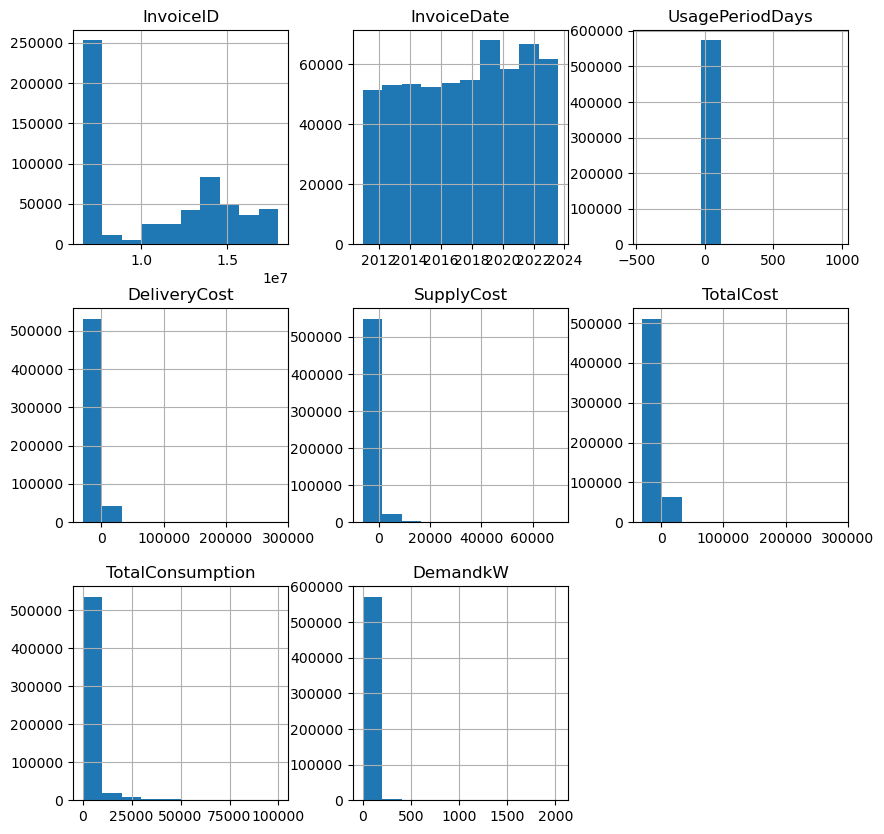

In [11]:
# plotting histogram for the columns
df.hist(figsize=(10, 10))
plt.show()

In [12]:
# Checking for duplicate InvoiceIDs
print("Duplicate InvoiceIDs:", df.duplicated(subset='InvoiceID').sum())

Duplicate InvoiceIDs: 0


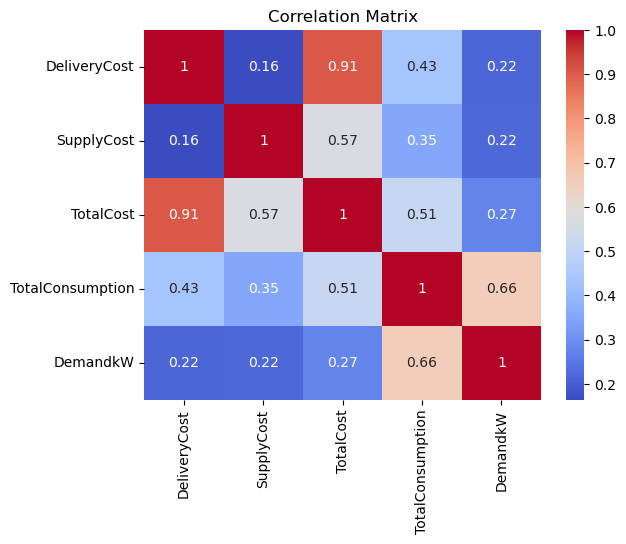

In [13]:
# Exploring correlations between different costs and consumption + demand
correlation_matrix = df[['DeliveryCost', 'SupplyCost', 'TotalCost', 'TotalConsumption', 'DemandkW']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix displays potential correlations between variables like delivery cost, supply cost, total cost, total consumption, and demand in kilowatts (kW) can be found.

We can observe that the matrix shows strong positive correlations between DeliveryCost and TotalCost (0.91), moderate correlations between SupplyCost and both TotalCost (0.57) and DemandkW (0.66), and weaker correlations between TotalConsumption and TotalCost (0.51). Other correlations are relatively weak, all under 0.35.

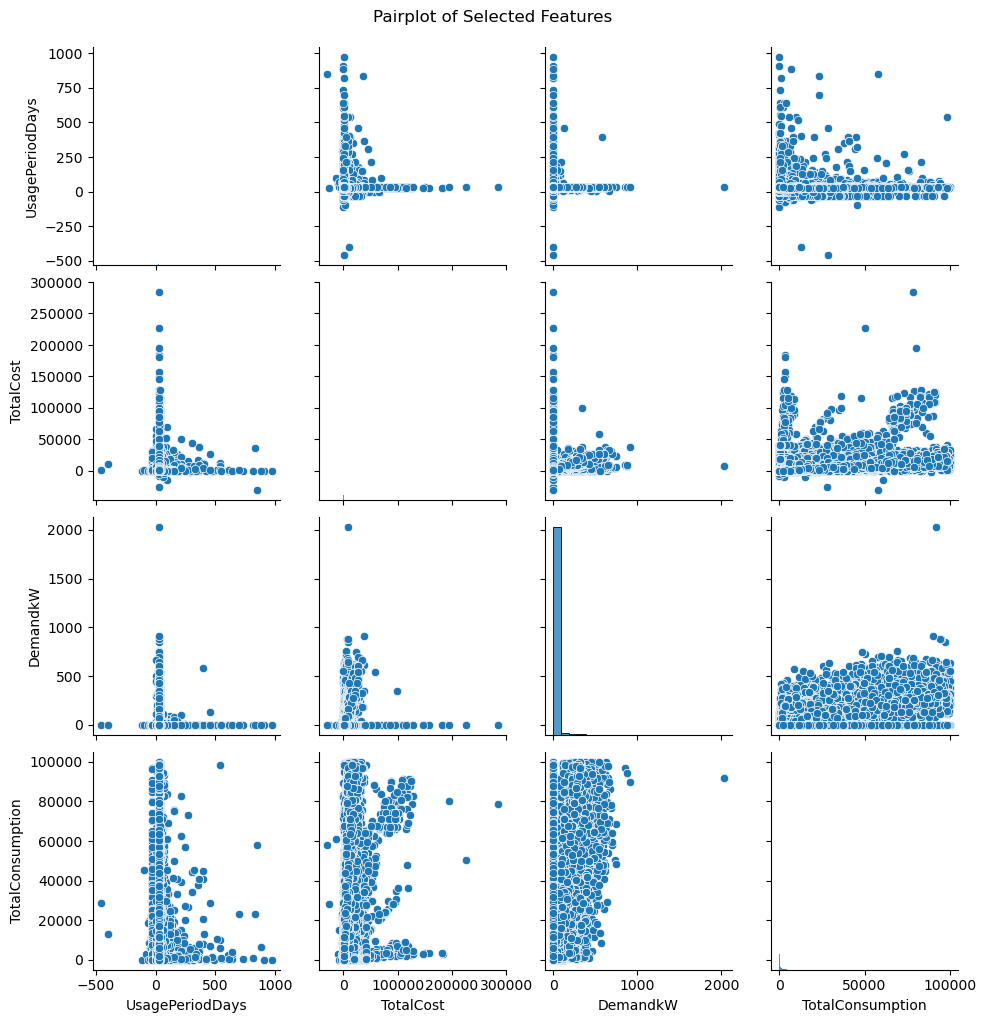

In [14]:
# Pairplot for all the columns/ features necessary for model selection 
sns.pairplot(df[['EnergyTypeName', 'UsagePeriodDays', 'TotalCost', 'DemandkW', 'Zip', 'TotalConsumption']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

###  Part 2 - Analysis of Utility Usage (according to neighbourhoods i.e. Zip Codes and Seasons):

#### 1. Zip Code
<center>
<img src="images/zip.png" width=200 />
</center>

In [15]:
# Find unique zip codes
print(df['Zip'].unique())

# Extract only numeric part from 'Zip Code'
df['Zip'] = df['Zip'].str.extract('(\d+)')

# Clean and standardize zip codes
df['Zip'] = df['Zip'].astype(str).str.strip()

['02108' '02119' '02124' '02135' '02115' '02127' '02126' '02129' '02215'
 '02114' '02125' '02131' '02110' '02128' '02111' '02132' '02122' '02109'
 '02118' '02130' '02116' '02136' '02201' '02210' '02121' '02108-4301'
 '02120' '02134' '02467' '02113' '02171' '02199' '02117' '02446'
 '02124     ' '02132     ' '02110     ' '02128     ' '02115     '
 '02199     ' '02203' '02122     ' '02210     ' '02135     ' '02136     '
 '02119     ' '02169' '02121     ' '02188' '02146' '02210-1226'
 '02113-1914' '02131-2522' '02126-1510' '02122-1223' '02130-3105'
 '02135-1629' '02115-3005' '02219' '02111-2406' '2109' '02119-1216'
 '02128-2511' '02127-1805']


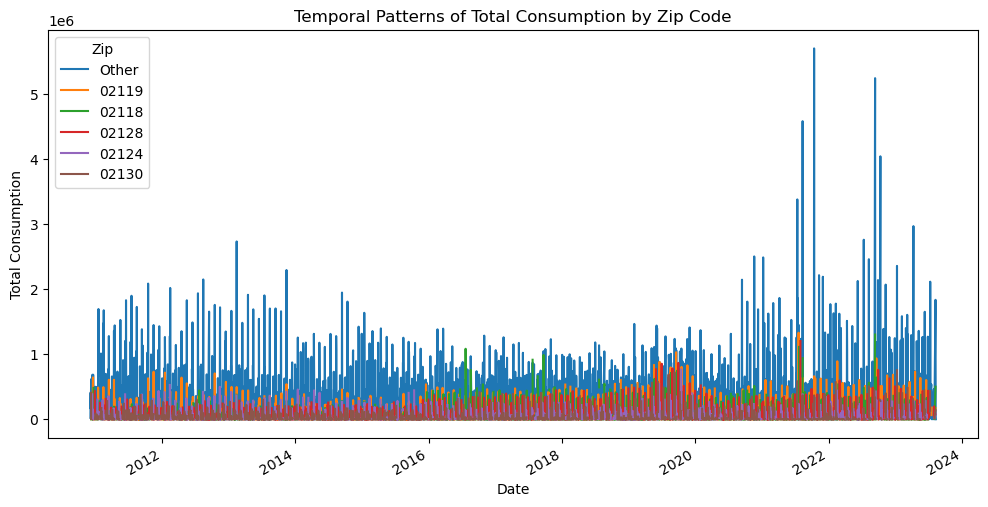

In [16]:
# Visualize temporal patterns of Total Consumption by Zip Code
temporal_df = df.groupby(['InvoiceDate', 'Zip'])['TotalConsumption'].sum().unstack()
top_zip_codes = temporal_df.sum().nlargest(5).index
temporal_df['Other'] = temporal_df.drop(top_zip_codes, axis=1).sum(axis=1)
temporal_df[ ['Other'] + list(top_zip_codes)].plot(figsize=(12, 6))
plt.title('Temporal Patterns of Total Consumption by Zip Code')
plt.xlabel('Date')
plt.ylabel('Total Consumption')
plt.show()

This graph sheds light on how consumption varies throughout the course of the observed time period in various zip areas.
- The lines fluctuates over time, indicating changes in total consumption for each zip code. 
- There are spikes at various points in the timeline for different zip codes, showing moments of peak consumption which is observed mainly in the years 2022 and 2023 for the zip 02119.
- And, the consumption has fluctuated quite less for the zip 02130 over the period of time.

In [17]:
# Calculate descriptive statistics for utility consumption in each neighborhood
df.groupby('Zip')['TotalConsumption'].describe()

,count,mean,std,min,25%,50%,75%,max
Zip,,,,,,,,
02108,7247.0,3990.717997,12973.147284,0.25,167.20,618.00,2310.00,98640.00
02109,7567.0,2616.951097,6648.242524,1.00,184.00,726.00,1857.50,98560.00
02110,9883.0,1694.590355,5154.797884,1.00,148.00,273.05,1488.00,83680.00
02111,9691.0,2199.780263,6410.357027,1.00,153.60,465.76,1625.50,98600.00
02113,5804.0,2039.703167,3089.803271,1.00,175.00,1012.00,2486.50,39360.00
02114,12310.0,2588.709575,7286.469670,0.21,219.00,617.50,2220.75,82448.00
02115,25868.0,2463.140239,8210.414797,1.00,219.00,750.00,1850.00,99960.00
02116,28397.0,1955.912377,5271.236396,1.00,162.00,540.00,1637.00,93400.00
02117,184.0,2595.130435,1830.193866,117.00,1378.00,1785.85,3422.75,8830.00


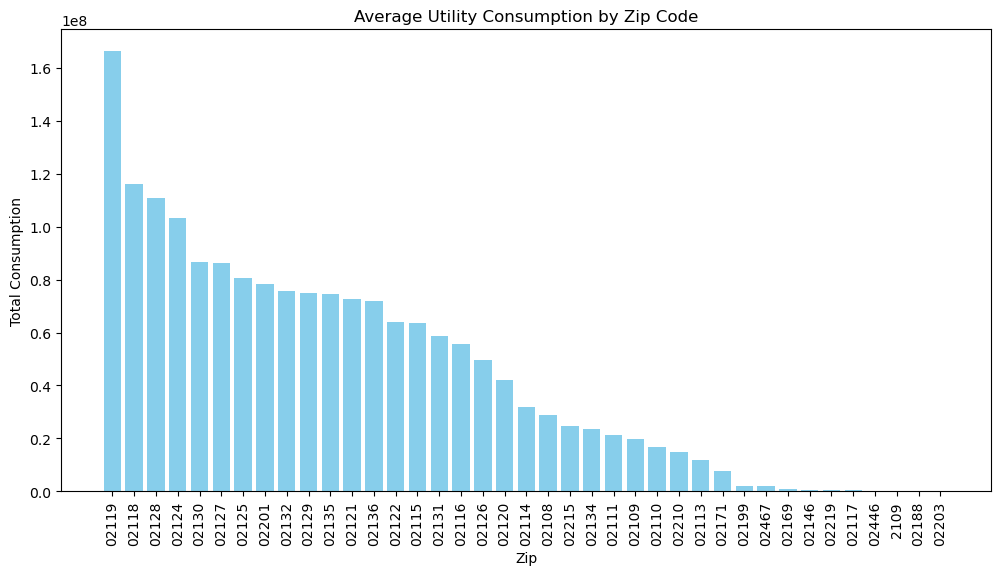

In [18]:
# Group by ZipCode and calculate the sum of TotalConsumption
zip_consumption = df.groupby('Zip')['TotalConsumption'].sum().reset_index()

# Sort by TotalConsumption for better visualization
zip_consumption = zip_consumption.sort_values(by='TotalConsumption', ascending=False)

# Plot utility consumption by zip code
plt.figure(figsize=(12, 6))
plt.bar(zip_consumption['Zip'], zip_consumption['TotalConsumption'], color='skyblue')
plt.xlabel('Zip')
plt.ylabel('Total Consumption')
plt.title('Average Utility Consumption by Zip Code')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

- The data reveals that Zip Code 02119 exhibits the highest utility consumption, with Zip Code 02118 ranking second in terms of consumption. In contrast, the Zip Codes falling within the range from 02169 to 02203 demonstrate nearly negligible utility consumption levels, approaching zero.
- The difference between highest and lowest is quite high, so we can check why this is so and respectively recommend the measures for optimum usage for the zip codes with high utility consumption.

#### 2. Seasons
<br>
<center>
<img src="images/seasons.png" width=200 />
</center>

In [19]:
# Extract the month from the date
df['Month'] = df['InvoiceDate'].dt.month

# Map the month to the corresponding season
season_mapping = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
}

df['Season'] = df['Month'].map(season_mapping)





"""We first extracted the month from the 'InvoiceDate' column
in DataFrame and stored it in a new column 'Month'.
Then, we mapped each month to its corresponding
season using a predefined 'season_mapping' dictionary
and created a new 'Season' column in
the DataFrame to represent the season
associated with each invoice date.
""""






C:\Users\aditi\AppData\Local\Temp\ipykernel_12844\2632124451.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Season', y='TotalConsumption', data=df, ci=None)  # Set ci=None to remove error bars


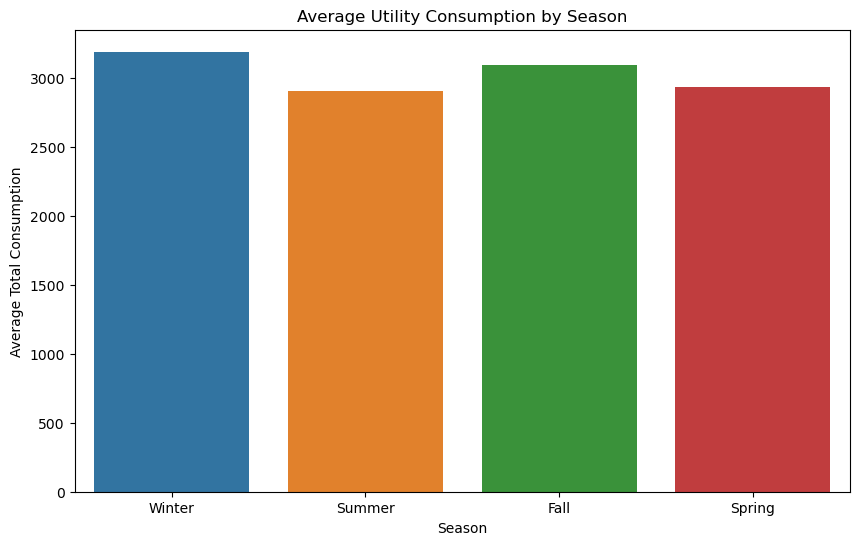

In [20]:
# Create a bar plot to visualize the average utility consumption by season
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='TotalConsumption', data=df, ci=None)  # Set ci=None to remove error bars
plt.title('Average Utility Consumption by Season')
plt.xlabel('Season')
plt.ylabel('Average Total Consumption')
plt.show()




"""
We Created a bar plot using Seaborn (sns.barplot) to visualize 
the average utility consumption by season. 
The x-axis represents the 'Season', and the y-axis shows 
the 'TotalConsumption'. 

"""


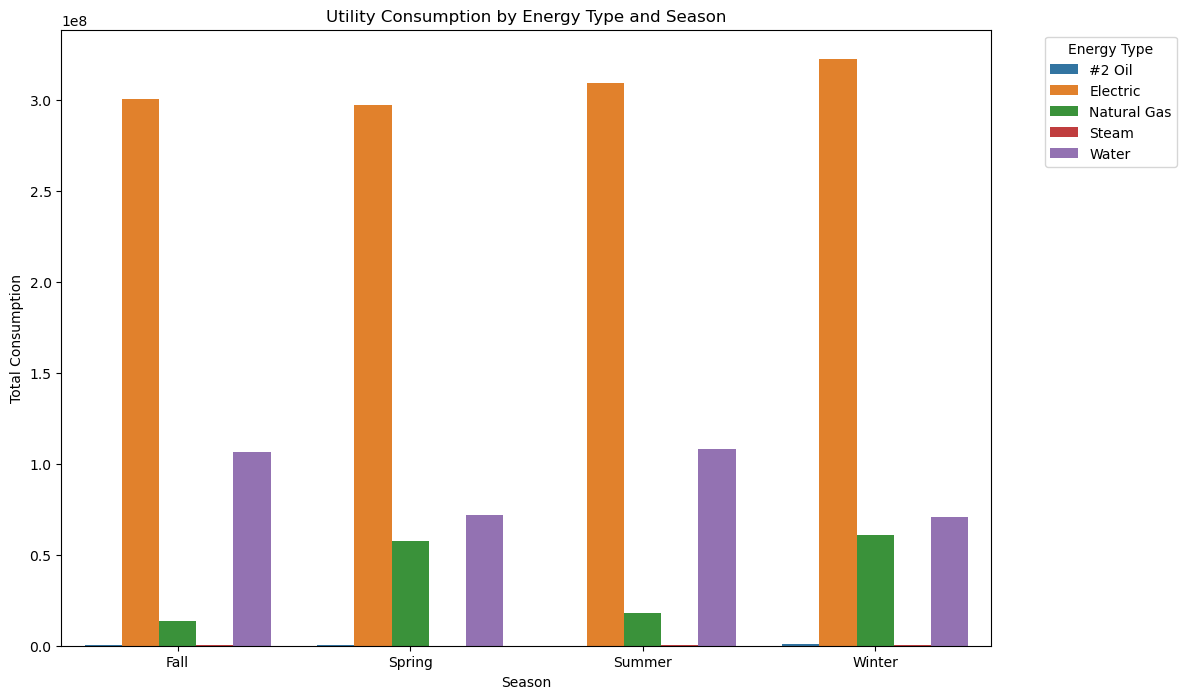

In [21]:
# Visualizing Total Consumption by different Energy Type and Season
grouped_data = df.groupby(['Season', 'EnergyTypeName'])['TotalConsumption'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Season', y='TotalConsumption', hue='EnergyTypeName', data=grouped_data)
plt.xlabel('Season')
plt.ylabel('Total Consumption')
plt.title('Utility Consumption by Energy Type and Season')
plt.legend(title='Energy Type', bbox_to_anchor=(1.05, 1), loc='upper left')
 
plt.show()



#Let's look at the in depth analysis for each energy type now.
"""
#Let's look at the in depth analysis for each energy type now.
We grouped the data by 'Season' and 'EnergyTypeName', 
calculating the sum of 'TotalConsumption'. 
Then, we created a bar plot with Seaborn, 
where 'Season' is on the x-axis,
'Total Consumption' on the y-axis, 
and bars are colored by 'EnergyTypeName'.


The graph shows seasonal variations in utility consumption
. Winter sees high electricity and natural gas usage, while summer 
has increased water consumption. Fall sees reduced reliance on 
natural gas, and spring is similar to winter for natural gas usage. 
This data can be used to optimize energy consumption based on weather 
conditions.








"""

- The graph visualizes the total consumption of different energy types across various seasons i.e Fall, Spring, Summer, Winter, using a grouped bar plot. 
- It suggests that in the winter months, there is elevated demand for electricity and  elevated for natural gas, whereas during the summer, water consumption notably rises. 
- Additionally, during the fall, there is a decreased reliance on natural gas, and spring exhibits consumption patterns similar to winter for natural gas usage.
- The variation in different utility cosumptions can be used for our model to study the trend and provide recommendations for optimising the consumption based on the weather.

### Part 3 - Predictive Modeling:

1. Model Selection -
- To choose the model to be used, we considered factors such as the continuous nature of our output variable and limitations on choosing the machine learning algorithms.
- Thus, we chose "Linear Regression" as our model of choice.

2. Feature Selection - 
- Based on the graphical analysis, specific features such as UsagePeriodDays,TotalCost, DemandkW have been chosen for modeling. In the context of linear regression, where a lack of linear relationships among features is preferred, certain columns (e.g., DeliveryCost, SupplyCost) were dropped to enhance model appropriateness.

In [22]:
# Encoding zip codes for modeling
zipcode_mapping = {zipcode: index for index, zipcode in enumerate(df['Zip'].unique())}
# Apply the mapping
df['Zip_Encoded'] = df['Zip'].map(zipcode_mapping)

In [23]:
# Encoding energy types for modeling
energytypename_mapping = {energytype: index for index, energytype in enumerate(df['EnergyTypeName'].unique())}
# Apply the mapping
df['Energy'] = df['EnergyTypeName'].map(energytypename_mapping)

<center>
<img src="images/energy.png" width=200 />
</center>

3. Feature Analysis - 

In [24]:
# Adding necessary imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [25]:
# Defining a function to perform the linear regression and return the model 
# as well as the root mean squared value which is the model evaluation paramter.

def train_and_evaluate_linear_regression(X_train, y_train, X_test, y_test):
    """
    Train a Linear Regression model, make predictions on the testing data, and evaluate the model.

    Parameters:
    - X_train (numpy array or DataFrame): Features of the training set.
    - y_train (numpy array or Series): Target variable of the training set.
    - X_test (numpy array or DataFrame): Features of the testing set.
    - y_test (numpy array or Series): Target variable of the testing set.

    Returns:
    - model: Trained Linear Regression model.
    - rmse: Root Mean Squared Error on the testing data.
    """
    # Create a Linear Regression model
    model = LinearRegression()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return model, rmse, y_pred

Experiment 1 - Using Normalization on the features

- Performing normalization on features, why is it required?
Since, the entries have high variance and the range is large, normalization of the features is necessary to scale down the data range and shape it in a uniform range to refine the output which enhances training stability and improves model performance.

In [26]:
df = df.reset_index(drop=True)

# Identifying features to be normalized 
data_to_normalize = df[['UsagePeriodDays', 'TotalCost', 'DemandkW']]

# Applying scaler
scaler = MinMaxScaler()

# Performing normalization
normalized_df = pd.DataFrame(scaler.fit_transform(data_to_normalize), columns = data_to_normalize.columns)

X = pd.concat([normalized_df, df[['Energy', 'Zip_Encoded']]], axis=1)
y = df['TotalConsumption']
 
# Splitting the data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
trained_model, test_rmse, y_pred = train_and_evaluate_linear_regression(X_train, y_train, X_test, y_test)
test_rmse

5669.473774302059

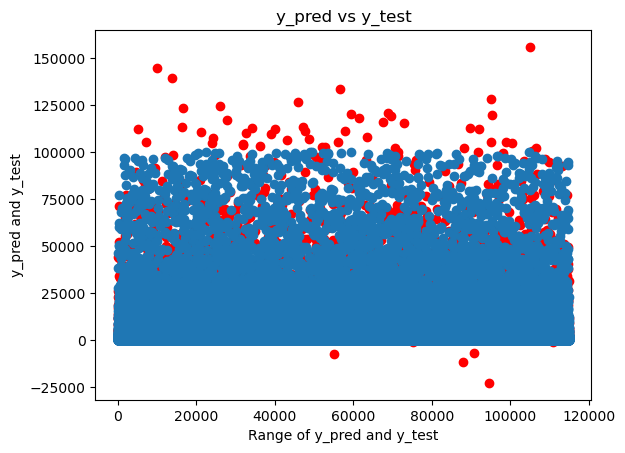

In [28]:
plt.scatter(range(0,len(y_pred)), y_pred, color='red') 
plt.scatter(range(0,len(y_test)), y_test) 
plt.xlabel('Range of y_pred and y_test') 
plt.ylabel('y_pred and y_test') 
plt.title('y_pred vs y_test') 
plt.show()

Experiment 2 - Using Normalization plus PCA (Principal Component Analysis) 

- Performing PCA (Principal Component Analysis) on features, why is it required?
It helps to efficiently reduce dimensionality, improving computational speed and model efficiency, enables the visualization of high-dimensional data. PCA helps filter out noise, enhance model generalization.

In [29]:
pca = PCA(n_components=2)
principal_components_training = pca.fit_transform(X_train)
principal_components_testing = pca.transform(X_test)

In [30]:
trained_model_pca, test_rmse_pca, y_pred = train_and_evaluate_linear_regression(principal_components_training, y_train, principal_components_testing, y_test)
test_rmse_pca

8618.776068796207

In conclusion, for the given data and experiments we conducted we found that:
the normalized data peformed better by giving less RMSE than the one where we applied PCA. This could be because of the nature of the data and the selected model.

### Part 4 -  Recommendations for Urban Sustainability:
<br>
<center>
<img src="images/bill.png" width=400 />
</center>

For Resourse Planning :

Based on the analysis of utility consumption patterns across seasons, with a focus on electricity, gas, and water, it's clear that there are distinct seasonal variations in demand. These are some recommendations and insights based on the findings:


1. Electricity Demand:
Year-Round Planning: Since electricity demand remains high throughout all seasons and peaks in winter, it's crucial to plan for consistent and reliable electricity supply year-round.
Winter Preparedness: Consider implementing strategies to manage the increased demand for electricity during winter. This may include upgrading infrastructure, optimizing power generation capabilities, and promoting energy-efficient practices.

2. Gas Demand:
Winter and Spring Preparedness: Given the higher demand for gas in winter and spring, focus on ensuring a robust and resilient gas supply infrastructure during these seasons. This may involve maintaining pipelines, storage facilities, and distribution networks to meet peak demand.
Diversification: Explore options for diversifying gas sources or investing in alternative energy solutions to mitigate potential supply challenges during peak seasons.

3. Water Demand:
Summer Water Management: With higher water demand in summer, prioritize water resource management strategies during this season. Consider implementing water conservation programs, promoting efficient irrigation practices, and monitoring water distribution systems for optimal usage.


### For electricity demand, we can prioritize year-round planning and winter preparedness, including infrastructure upgrades and energy-efficient practices, to meet consistent and peak demands.

### We can address gas demand by focusing on winter and spring preparedness, maintaining infrastructure, and exploring diversification of gas sources for supply resilience.

### To manage water demand effectively, especially in summer, we can implement conservation programs, promote efficient irrigation practices, and monitor water distribution systems to ensure optimal usage.


For Utility Companies/ Policy makers :

With focus on zip codes with the highest total consumption for each utility; 
1. Consider implementing energy-efficient solutions, such as promoting energy-saving practices, installing energy-efficient appliances, or upgrading to smart grids.

2. Assess whether the existing infrastructure in high-consumption zip codes can handle the demand or if there are capacity constraints.

3. If needed, plan for infrastructure upgrades to accommodate the higher demand. This could include upgrading power lines, water supply systems, or gas pipelines.

4. Engage in community outreach to raise awareness about utility consumption patterns and the importance of efficient resource usage.